# Imports

In [1]:
%run Imports.ipynb

# Data

In [2]:
path = "../Data/Deutschland/"
path_rml_yt = path + "RML_YouTube/"
path_rml_web = path + "Robert_Marc_Lehmann_Websuche/"
path_zoos_web = path + "Zoos_Websuche/"
path_zoos_yt = path + "Zoos_YouTubesuche/"
path_vdz_web = path + "Verband der Zoologischen Gärten/"

In [3]:
file = 'multiTimeline.csv'

In [16]:
df = pd.read_csv(path + 'combined_timeseries.csv')
df.head()

,Monat,RML Websuche,Zoos Web,Zoos YT,VdZ Web
0,2017-01,0,11,0,0
1,2017-02,0,15,0,0
2,2017-03,0,18,0,0
3,2017-04,0,23,0,0
4,2017-05,0,15,0,0


## Recombine files

In [ ]:
# rml_yt = pd.read_csv(path_rml_yt + file, skiprows=1)
# rml_web = pd.read_csv(path_rml_web + file, skiprows=1)
# zoos_web = pd.read_csv(path_zoos_web + file, skiprows=1)
# zoos_yt = pd.read_csv(path_zoos_yt + file, skiprows=1)
# vdz_web = pd.read_csv(path_vdz_web + file, skiprows=1)

In [ ]:
# print(rml_yt.columns)
# print(zoos_web.columns)
# print(zoos_yt.columns)
# print(vdz_web.columns)

Index(['Monat', 'Robert Marc Lehmann: (Deutschland)'], dtype='object')
Index(['Monat', 'zoos: (Deutschland)'], dtype='object')
Index(['Monat', 'zoos: (Deutschland)'], dtype='object')
Index(['Monat', 'Verband der Zoologischen Gärten: (Deutschland)'], dtype='object')


In [15]:
# df = rml_web.copy()
# df = df.rename(columns={"Robert Marc Lehmann: (Deutschland)": "RML Websuche"})
# df['Zoos Web'] = zoos_web["zoos: (Deutschland)"]
# df['Zoos YT'] = zoos_yt["zoos: (Deutschland)"]
# df['VdZ Web'] = vdz_web["Verband der Zoologischen Gärten: (Deutschland)"]
# df.head()

# View

In [19]:
df.head()

,Monat,RML Websuche,Zoos Web,Zoos YT,VdZ Web
0,2017-01,0,11,0,0
1,2017-02,0,15,0,0
2,2017-03,0,18,0,0
3,2017-04,0,23,0,0
4,2017-05,0,15,0,0


In [29]:
df.describe()

,RML Websuche,Zoos Web,Zoos YT,VdZ Web
count,97.000000,97.000000,97.000000,97.000000
mean,15.268041,19.288660,22.907216,16.649485
std,18.972851,11.119576,23.083671,19.599661
min,0.000000,8.000000,0.000000,0.000000
25%,1.000000,14.000000,0.000000,0.000000
50%,6.000000,18.000000,20.000000,18.000000
75%,23.000000,22.000000,38.000000,27.000000
max,100.000000,100.000000,100.000000,100.000000


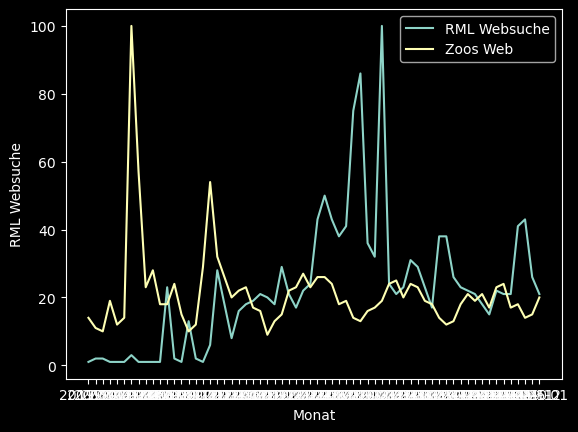

In [30]:
sns.lineplot(data=df[33:], x='Monat', y='RML Websuche', label='RML Websuche')
sns.lineplot(data=df[33:], x='Monat', y='Zoos Web', label='Zoos Web')
plt.show()

In [22]:
df.columns

Index(['Monat', 'RML Websuche', 'Zoos Web', 'Zoos YT', 'VdZ Web'], dtype='object')

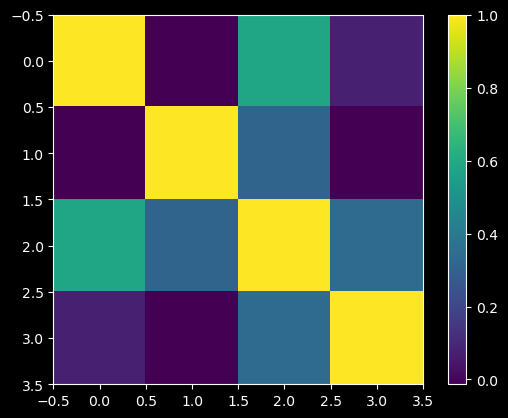

In [25]:
plt.imshow(df[['RML Websuche', 'Zoos Web', 'Zoos YT', 'VdZ Web']].corr())
plt.colorbar()
plt.show()